<a href="https://colab.research.google.com/github/commitit/Stock-Prediction/blob/main/stock_predictionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import tensorflow as tf

import datetime

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/commitit/Stock-Prediction/main/AXP.csv")

In [49]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,3.693287,3.693287,3.693287,3.693287,0.406085,0.0
1,1972-06-02,3.677195,3.677195,3.677195,3.677195,0.404316,0.0
2,1972-06-05,3.604777,3.604777,3.604777,3.604777,0.396353,0.0
3,1972-06-06,3.411664,3.411664,3.411664,3.411664,0.375120,0.0
4,1972-06-07,3.371432,3.371432,3.371432,3.371432,0.370696,0.0
5,1972-06-08,3.451896,3.451896,3.451896,3.451896,0.379544,0.0
6,1972-06-09,3.427757,3.427757,3.427757,3.427757,0.376890,0.0
7,1972-06-12,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
8,1972-06-13,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
9,1972-06-14,3.443850,3.443850,3.443850,3.443850,0.378659,0.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12064 non-null  object 
 1   Open       12064 non-null  float64
 2   High       12064 non-null  float64
 3   Low        12064 non-null  float64
 4   Close      12064 non-null  float64
 5   Adj Close  12064 non-null  float64
 6   Volume     12064 non-null  float64
dtypes: float64(6), object(1)
memory usage: 659.9+ KB


In [51]:
df["Date"] = pd.to_datetime(df["Date"])
df.index = df.pop("Date")

In [52]:
df = df[["Close"]]

In [53]:
df.head()

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432


In [54]:
df.describe()

,Close
count,12064.000000
mean,29.681398
std,30.876242
min,1.134539
25%,4.747363
50%,13.038323
75%,47.703850
max,136.929993


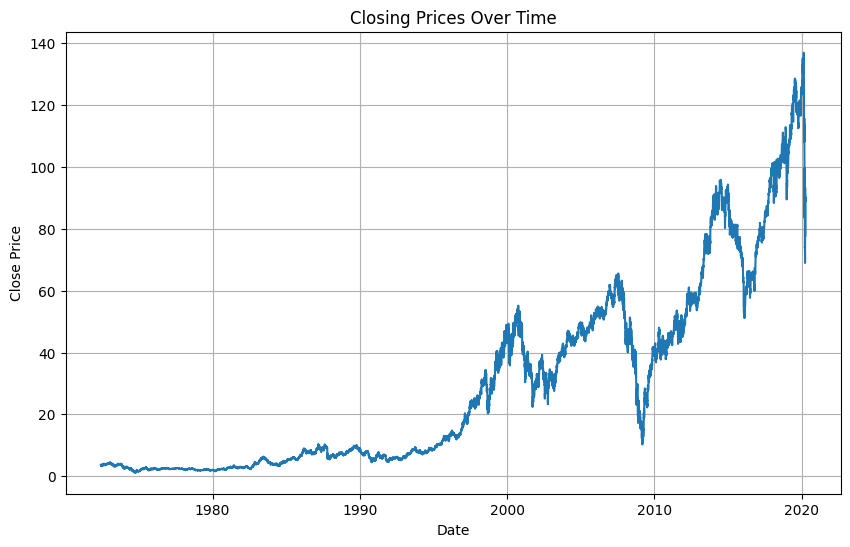

In [55]:
#Visualize
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [56]:
#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse

In [57]:

scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.65639501],
       [0.62207872],
       [0.56486027]])

In [58]:
df.head()

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432


In [59]:
#splitting dataset into train and test split
training_size = int(len(df1)*0.8)
test_size = len(df1)-training_size
train_data,test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]

In [60]:
training_size, test_size

(9651, 2413)

In [61]:
len(train_data), len(test_data)


(9651, 2413)

In [62]:
train_data

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.28421762],
       [0.29290716],
       [0.28539586]])

	for i in range(len(stock_data)-time_step-1):  
		X.append(stock_data[i:(i+time_step), 0])  ###i=0, 0,1,2,3-----99   100
		Y.append(stock_data[i + time_step, 0])

In [63]:
# Convert data in the form of a 3D array for our LSTM model.
# 60 timestep;12064 length of the data

# convert an array of values into a dataset matrix
def create_AR(stock_data, time_step=1):
	X, Y = [], []
	for i in range(time_step, len(stock_data)):
		a = stock_data[i-time_step:i, 0]   ###i=0, 0,1,2,3-----99   100
		X.append(a)
		Y.append(stock_data[i,0])
	return np.array(X), np.array(Y)

In [64]:
time_step = 100
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
X_train, y_train = create_AR(train_data, time_step)
X_test, y_test = create_AR(test_data, time_step)

In [65]:
print(X_train.shape), print(y_train.shape)

(9551, 100)
(9551,)


(None, None)

In [66]:
print(X_test.shape), print(y_test.shape)

(2313, 100)
(2313,)


(None, None)

In [67]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Should we add an Input layer and another Dense layer with the activation "Relu" and see if our pred gets better ? @ Sonam

model = Sequential([layers.Input(()),
                    layers.LSTM(64),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(1)]
model.compile(loss="mse", optimizer = Adam(learning_rate=0.001), metrics=["mean_absolute_error"])



In [80]:
#Model

### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics = ["mean_absolute_error"])

modelresult = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30, batch_size=64,verbose=1)


Epoch 1/30
150/150 [==============================] - 10s 23ms/step - loss: 0.0013 - mean_absolute_error: 0.0194 - val_loss: 0.0054 - val_mean_absolute_error: 0.0648
Epoch 2/30
150/150 [==============================] - 2s 16ms/step - loss: 3.5760e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0021 - val_mean_absolute_error: 0.0357
Epoch 3/30
150/150 [==============================] - 3s 21ms/step - loss: 3.0816e-04 - mean_absolute_error: 0.0105 - val_loss: 9.3879e-04 - val_mean_absolute_error: 0.0219
Epoch 4/30
150/150 [==============================] - 3s 20ms/step - loss: 2.7221e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0018 - val_mean_absolute_error: 0.0333
Epoch 5/30
150/150 [==============================] - 2s 16ms/step - loss: 2.5716e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0014 - val_mean_absolute_error: 0.0288
Epoch 6/30
150/150 [==============================] - 2s 15ms/step - loss: 2.6500e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0034 - val_mean_absolute

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_3 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

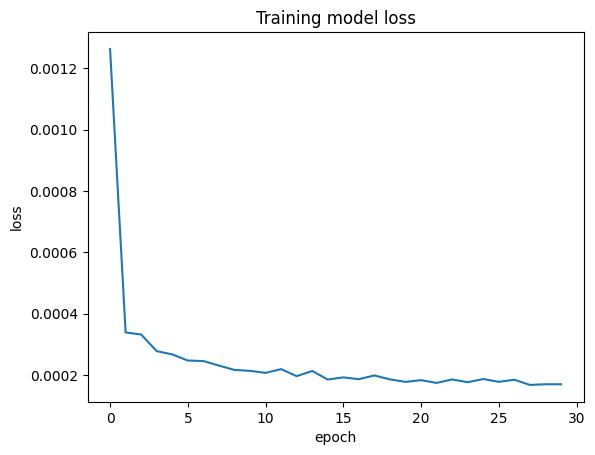

In [105]:
plt.plot(modelresult.history["loss"])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [106]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

73/73 [==============================] - 0s 6ms/step


299/299 [==============================] - 4s 8ms/step


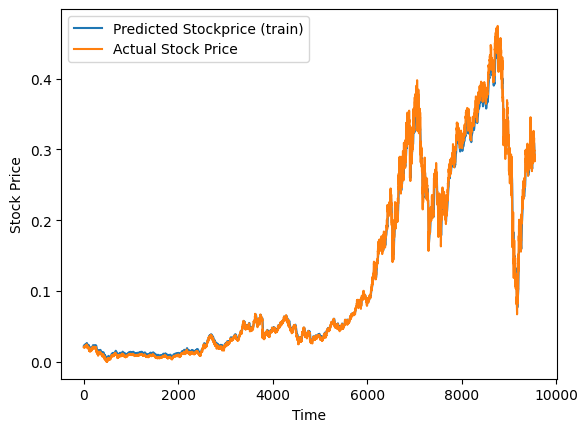

In [71]:
#Visualize actual stockprice and predicted strockprice (train)
plt.plot(train_pred)
plt.plot(y_train)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(["Predicted Stockprice (train)", "Actual Stock Price"])

73/73 [==============================] - 1s 7ms/step


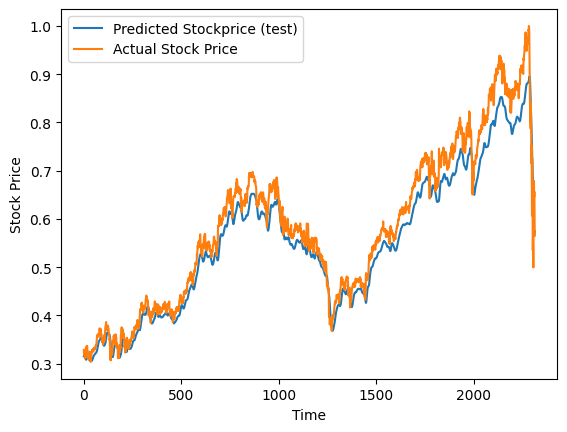

In [72]:
#Visualize actual stockprice and predicted strockprice (test)
plt.plot(test_pred)
plt.plot(y_test)

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(["Predicted Stockprice (test)", "Actual Stock Price"])

In [107]:
#We have to do an inverse transform (before we concatenate array with 0)
train_pred = np.c_[train_pred, np.zeros(train_pred.shape)]
test_pred = np.c_[test_pred, np.zeros(test_pred.shape)]

In [108]:
#invert prediction
train_pred = scaler.inverse_transform(train_pred)
train_pred = [x[0] for x in train_pred]
test_pred = scaler.inverse_transform(test_pred)
test_pred = [x[0] for x in test_pred]

In [109]:
print(train_pred[:5])
print(test_pred[:5])

[3.4914922613625192, 3.531560793458052, 3.5714330450893135, 3.6057790910718666, 3.631934980568463]
[45.058691465679146, 45.11082517579754, 45.06750587498188, 44.91699720557473, 44.71471501081868]


In [110]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

24.549749289295963

In [111]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_pred))

80.70643748642368

In [ ]:
from sklearn.metrics import mean_squared_error

#calculate root mean squared error

meanscore = mean_squared_error

In [73]:
#another option to inverse transform -> @Sonam: lets check together which method is better
train_pred = train_pred.reshape(-1,1)
test_pred = test_pred.reshape(-1,1)

##Transformback to original form
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [74]:
test_pred

array([[43.951538],
       [44.09135 ],
       [44.182487],
       ...,
       [78.192215],
       [78.57998 ],
       [79.18725 ]], dtype=float32)

In [112]:
len(test_data)

2413